# Generalisation to DR16Q superset

In [1]:
using CSV, DataFrames, Flux, HDF5, Random, Statistics, Plots, Printf, StatsBase, StatsPlots
include("BayesianSZNet.jl")
using .BayesianSZNet

In [2]:
superset = h5open("data/dr16q_superset.hdf5", "r")
id = read(superset, "id")
n = size(id, 2)
X = read(superset, "X")
df = DataFrame(
    plate=id[1, :],	mjd=id[2, :], fiberid=id[3, :],
    z=read(superset, "z"),
    source_z=read(superset, "source_z"),
    z_vi=read(superset, "z_vi"),
    z_pipe=read(superset, "z_pipe"),
    zwarning=read(superset, "zwarning"),
    z_dr12q=read(superset, "z_dr12q"),
    z_dr7q_sch=read(superset, "z_dr7q_sch"),
    z_dr6q_hw=read(superset, "z_dr6q_hw"),
    z_10k=read(superset, "z_10k"),
    pipe_corr_10k=read(superset, "pipe_corr_10k"),
    z_pca=read(superset, "z_pca"),
    z_qn=read(superset, "z_qn"),
    sn=read(superset, "sn_median_all"),
    is_qso_final=read(superset, "is_qso_final"),
    idx_10k=read(superset, "idx_10k"))
# TODO ẑs = Float32.(read(superset, "zs_pred"))
close(superset)
df

1440573×18 DataFrame
     Row │ plate  mjd    fiberid  z             source_z  z_vi     z_pipe      ⋯
         │ Int32  Int32  Int32    Float32       String    Float32  Float32     ⋯
─────────┼──────────────────────────────────────────────────────────────────────
       1 │   266  51630        3   0.652926     DR6Q_HW      -1.0  -1.0        ⋯
       2 │   266  51630       58   1.47499      DR6Q_HW      -1.0  -1.0
       3 │   266  51630       80   1.77284      DR6Q_HW      -1.0  -1.0
       4 │   266  51630      126   0.518666     DR6Q_HW      -1.0  -1.0
       5 │   266  51630      161   0.325738     DR6Q_HW      -1.0  -1.0        ⋯
       6 │   266  51630      200   0.288773     DR6Q_HW      -1.0  -1.0
       7 │   266  51630      208   1.36284      DR6Q_HW      -1.0  -1.0
       8 │   266  51630      225   1.62085      DR6Q_HW      -1.0  -1.0
       9 │   266  51630      238   1.58165      DR6Q_HW      -1.0  -1.0        ⋯
      10 │   266  51630      252   0.339776     DR6Q_HW      -1.0  -1.0
      11 │   266  51630      282   1.88065      DR6Q_HW      -1.0  -1.0
    ⋮    │   ⋮      ⋮       ⋮          ⋮           ⋮         ⋮          ⋮      ⋱
 1440564 │  9632  58130      866   2.58021      PIPE         -1.0   2.58021
 1440565 │  9632  58130      870   0.464579     PIPE         -1.0   0.464579   ⋯
 1440566 │  9632  58130      871   1.33227      PIPE         -1.0   1.33227
 1440567 │  9632  58130      902   3.67491      PIPE         -1.0   3.67491
 1440568 │  9632  58130      915   2.3668       DR6Q_HW      -1.0   2.36392
 1440569 │  9632  58130      918  -0.000191875  PIPE         -1.0  -0.00019187 ⋯
 1440570 │  9632  58130      936   1.55917      PIPE         -1.0   1.55917
 1440571 │  9632  58130      937   1.94622      PIPE         -1.0   1.94622
 1440572 │  9632  58130      957  -0.000152539  PIPE         -1.0  -0.00015253
 1440573 │  9632  58130      972   0.482465     PIPE         -1.0   0.482465   ⋯
                                             12 columns and 1440552 rows omitted

In [3]:
function preview(df, i)
    spec = df[i, :]
    label = @sprintf("spec-%04d-%5d-%04d.fits", spec.plate, spec.mjd, spec.fiberid)
    # TODO title = @sprintf(
    #    "z = %.3f; source = %s; ẑ = %.2f; E = %.1f; QSO = %d",
    #    spec.z, spec.source_z, spec.ẑ, spec.entropy, spec.is_qso_final)
    plot_spectrum(X[:, i], legend=:bottomright, label=label)
    # TODO plot_spectral_lines!(spec.z)
    # TODO plot_spectral_lines!(spec.ẑ, color=:red, location=:bottom)
end

preview (generic function with 1 method)

## $z > 6.445$

In [4]:
# TODO change the threshold
df_high_z = df[df.z .> 6.445, :]
n_high_z = size(df_high_z, 1)
countmap(df_high_z.source_z)

Dict{String,Int64} with 2 entries:
  "PIPE" => 1460
  "VI"   => 2

In [5]:
first_vi, second_vi = (1:n_high_z)[df_high_z.source_z .== "VI"]

2-element Array{Int64,1}:
 1202
 1365

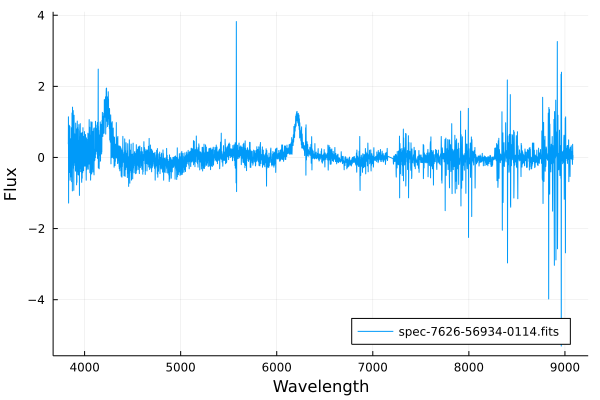

In [6]:
preview(df_high_z, first_vi)

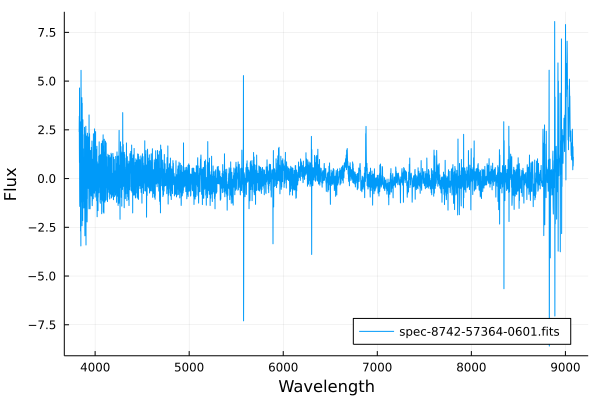

In [7]:
preview(df_high_z, second_vi)

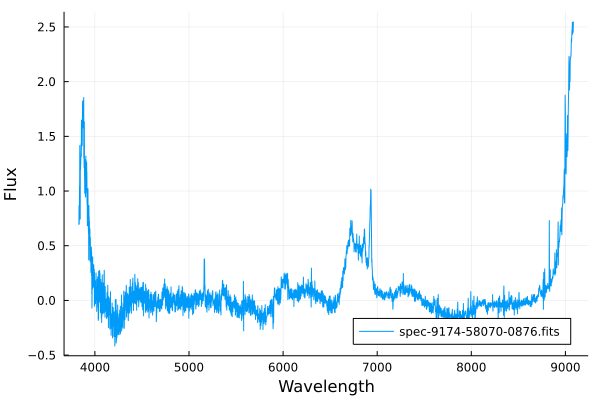

In [8]:
preview(df, 1412574)

## Random visual inspection of 10k spectra

In [9]:
df_10k = df[df.idx_10k, :]

8668×18 DataFrame
  Row │ plate  mjd    fiberid  z         source_z  z_vi     z_pipe    zwarning ⋯
      │ Int32  Int32  Int32    Float32   String    Float32  Float32   Int32    ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 10000  57346       70  0.975442  PIPE       -1.0    0.975442         0 ⋯
    2 │ 10000  57346       97  1.06827   PIPE       -1.0    1.06827          0
    3 │ 10000  57346      142  1.544     VI          1.55   1.55989          0
    4 │ 10000  57346      200  0.482203  PIPE       -1.0    0.482203         0
    5 │ 10000  57346      304  1.95071   PIPE       -1.0    1.95071          0 ⋯
    6 │ 10000  57346      314  1.03273   PIPE       -1.0    1.03273          0
    7 │ 10000  57346      406  2.00653   PIPE       -1.0    2.00653          0
    8 │ 10000  57346      414  1.97449   PIPE       -1.0    1.97449          0
    9 │ 10000  57346      432  0.537     VI          1.783  1.78309          4 ⋯
   10 │ 10000  57346      658  2.00247   PIPE       -1.0    2.00247          0
   11 │ 10000  57716       28  1.3967    PIPE       -1.0    1.3967           0
  ⋮   │   ⋮      ⋮       ⋮        ⋮         ⋮         ⋮        ⋮         ⋮     ⋱
 8659 │  9394  58108      750  1.84514   PIPE       -1.0    1.84514          0
 8660 │  9423  58100      445  2.08415   PIPE       -1.0    2.08415          0 ⋯
 8661 │  9436  58103       36  3.17489   PIPE       -1.0    3.17489          0
 8662 │  9548  57785      153  2.51      VI          2.512  2.45642          4
 8663 │  9560  57805      367  2.392     VI          2.392  2.37134          0
 8664 │  9607  58085      657  1.84988   PIPE       -1.0    1.84988          0 ⋯
 8665 │  9610  58112       21  1.85739   PIPE       -1.0    1.85739          0
 8666 │  9610  58137      942  2.28295   PIPE       -1.0    2.28295          0
 8667 │  9616  58135       75  1.83442   PIPE       -1.0    1.83442          0
 8668 │  9627  58132       26  2.07305   PIPE       -1.0    2.07305          0 ⋯
                                                10 columns and 8647 rows omitted

In [10]:
# TODO change to appropriate model
sznet = SZNet("models/sznet_1_0.05_0.0001.bson")
X_10k = X[:, df.idx_10k]
X_10k_gpu = gpu(X_10k)
Random.seed!(87)
ẑs_10k = BayesianSZNet.sample(sznet, X_10k_gpu)
ẑ_10k = mean(ẑs_10k, dims=1)

1×8668 Array{Float32,2}:
 0.972563  1.06829  1.56025  0.448036  …  1.87409  2.26984  1.83675  2.0745

In [11]:
mcrps(Flux.unsqueeze(df_10k.z_10k, 1), ẑs_10k)

0.055778097f0

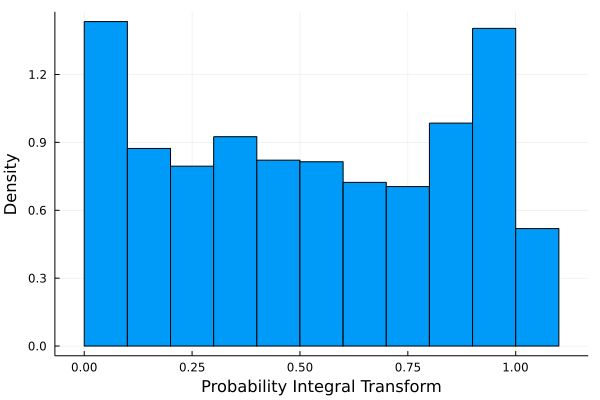

In [12]:
pithist(Flux.unsqueeze(df_10k.z_10k, 1), ẑs_10k)

In [13]:
rmse(Flux.unsqueeze(df_10k.z_10k, 1), ẑ_10k)

0.19282291890761094

In [14]:
rmse_df(z, ẑ) = BayesianSZNet.rmse(Flux.unsqueeze(z, 1), Flux.unsqueeze(ẑ, 1))

rmse_df (generic function with 1 method)

In [15]:
rmse_df(df_10k.z_10k, df_10k.z_pipe)

0.22886184109250143

In [16]:
rmse_df(df_10k.z_10k, df_10k.z_pca)

0.21143056630755902

In [17]:
idx_10k_qn = df_10k.z_qn .> -1
rmse_df(df_10k.z_10k[idx_10k_qn], df_10k.z_qn[idx_10k_qn])

0.5406336846856777

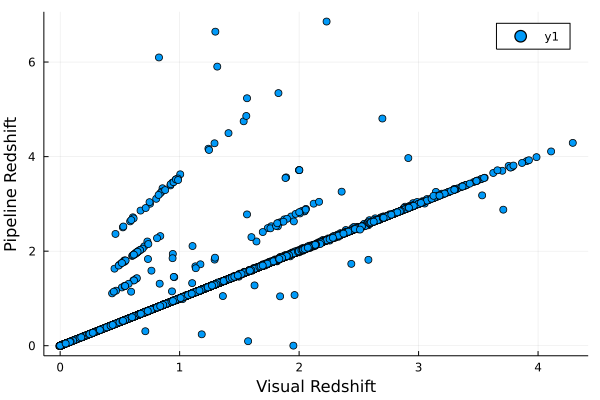

In [18]:
@df df_10k scatter(:z_10k, :z_pipe, xlabel="Visual Redshift", ylabel="Pipeline Redshift")

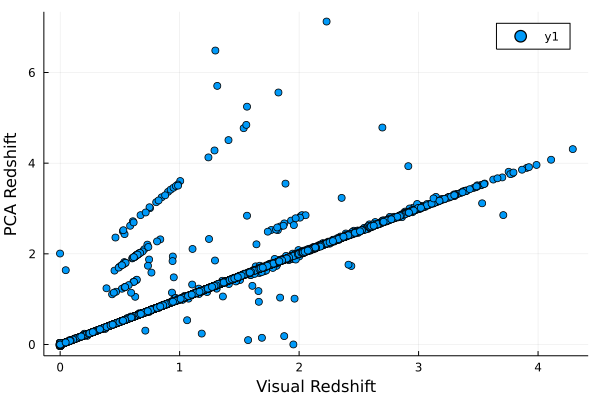

In [19]:
@df df_10k scatter(:z_10k, :z_pca, xlabel="Visual Redshift", ylabel="PCA Redshift")

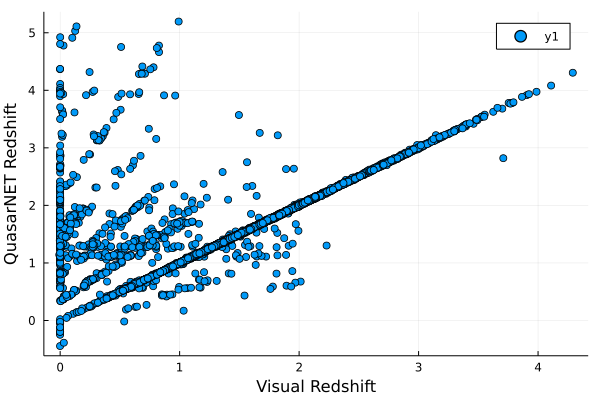

In [20]:
@df df_10k scatter(
    :z_10k[idx_10k_qn], :z_qn[idx_10k_qn],
    xlabel="Visual Redshift", ylabel="QuasarNET Redshift")

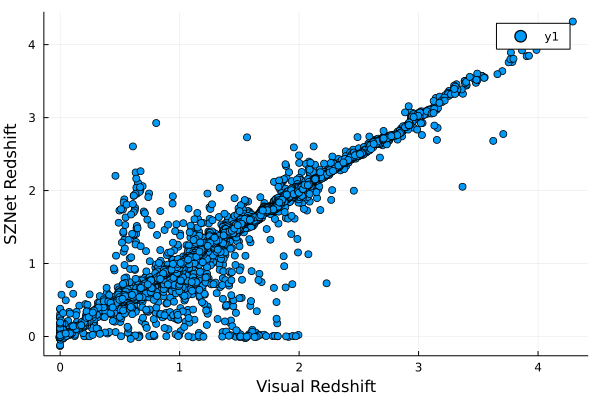

In [21]:
@df df_10k scatter(:z_10k, ẑ_10k[:], xlabel="Visual Redshift", ylabel="SZNet Redshift")

## Suggestions of redshifts

In [22]:
# TODO

## Spectra with the highest sample variance

In [23]:
var_10k = dropdims(var(ẑs_10k, dims=1), dims=1)

8668-element Array{Float32,1}:
 0.0006162234
 0.00055568496
 0.00042663247
 0.0024584709
 0.0007783065
 0.0019145182
 0.00073507224
 0.0017557718
 0.0031013316
 0.000737618
 0.0004634971
 0.00064530707
 0.0005174772
 ⋮
 0.0007173979
 0.0045239623
 0.0017261046
 0.0006824962
 0.004736758
 0.0012903847
 0.0010145754
 0.001236459
 0.0011409026
 0.0009702097
 0.0008570918
 0.0009009725

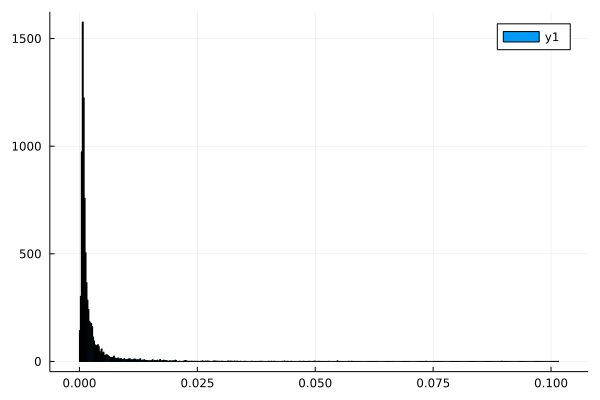

In [24]:
histogram(var_10k)

In [25]:
i_high_var_10k = sortperm(var_10k, rev=true)[1:2]

2-element Array{Int64,1}:
 6880
  923

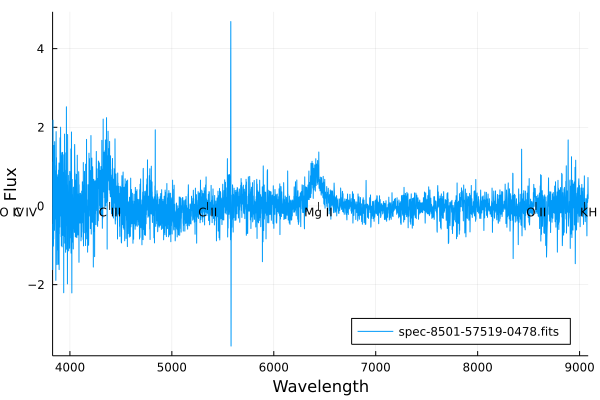

In [26]:
preview(df_10k, i_high_var_10k[1])
plot_spectral_lines!(1.3)

In [27]:
df_10k[6880, [:z, :source_z, :z_vi, :z_pipe, :z_10k]]

DataFrameRow
  Row │ z        source_z  z_vi     z_pipe   z_10k   
      │ Float32  String    Float32  Float32  Float32 
──────┼──────────────────────────────────────────────
 6880 │   0.811  VI          2.282  2.27407    0.811

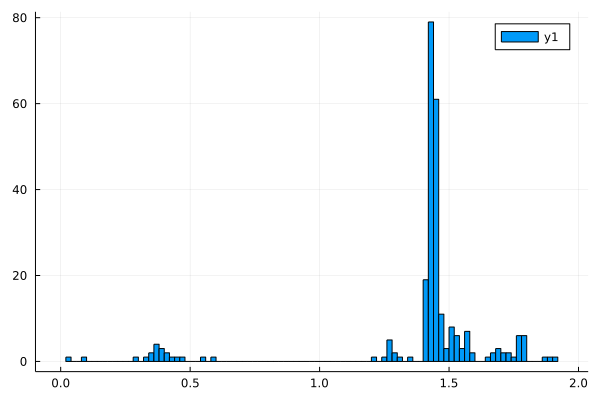

In [28]:
histogram(ẑs_10k[:, 6880])

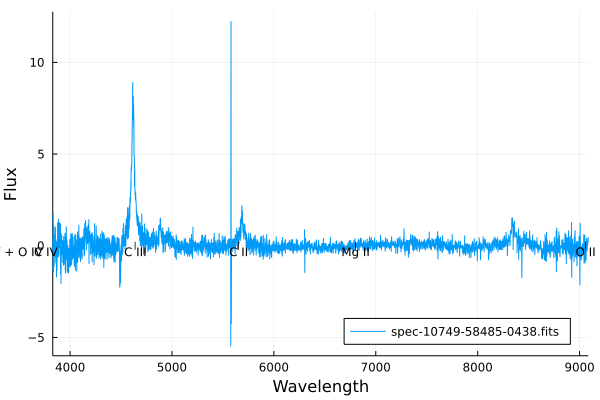

In [29]:
preview(df_10k, i_high_var_10k[2])
plot_spectral_lines!(1.43)

In [30]:
df_10k[923, [:z, :source_z, :z_vi, :z_pipe, :z_10k]]

DataFrameRow
 Row │ z        source_z  z_vi     z_pipe   z_10k   
     │ Float32  String    Float32  Float32  Float32 
─────┼──────────────────────────────────────────────
 923 │  1.3359  PIPE         -1.0   1.3359   1.3359

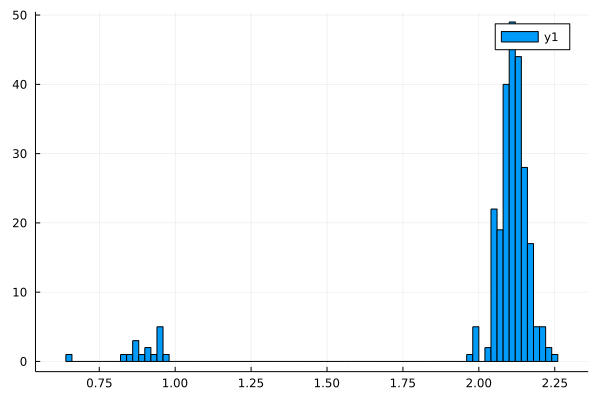

In [31]:
histogram(ẑs_10k[:, 923])

## Utilisation of uncertainties

In [32]:
n_10k = size(df_10k, 1)

8668

In [33]:
ts = 0.001:0.001:maximum(var_10k)

0.001:0.001:0.101

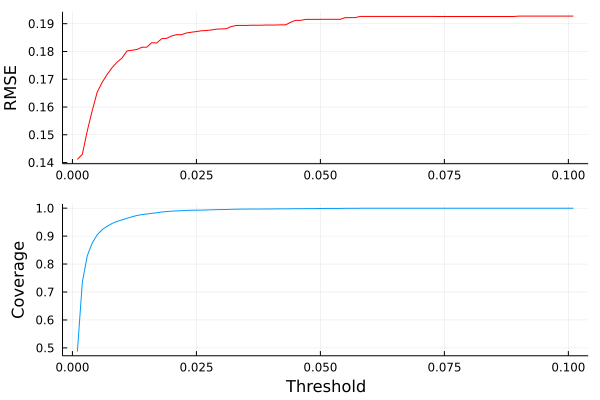

In [34]:
coverages = [sum(var_10k .< t) / n_10k for t in ts]
rmses = [rmse(Flux.unsqueeze(df_10k.z_10k[var_10k .< t], 1), ẑ_10k[:, var_10k .< t])
    for t in ts]
plot(
    plot(ts, rmses, color="red", ylabel="RMSE", label=:none),
    plot(ts, coverages, label=:none, xlabel="Threshold", ylabel="Coverage"),
    layout=@layout[a; b])

In [35]:
ceil(Int, n * 0.01), ceil(Int, n * 0.05), ceil(Int, n * 0.1)

(14406, 72029, 144058)